In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor

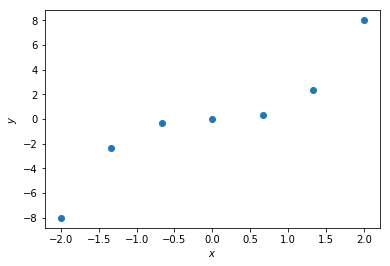

In [2]:
X = np.linspace(-2, 2, 7)
y = X ** 3 # original dependecy 

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

In [12]:
X= X.reshape(-1,1)

In [32]:
tree = DecisionTreeRegressor(max_depth=1,max_leaf_nodes=1)
tree.fit(X, y)

ValueError: max_leaf_nodes 1 must be either None or larger than 1

In [26]:
tree.n_classes_, tree.n_features_, tree.n_outputs_

(1, 1, 1)

In [32]:
from pydotplus.graphviz import graph_from_dot_data


In [31]:
dot_data = export_graphviz(                           # Create dot data
    tree, filled=True, rounded=True,
    class_names=['y'],
    feature_names=['X'],
    out_file=None
)

graph = graph_from_dot_data(dot_data)                 # Create graph from dot data
graph.write_png('tree_2.png')    

True

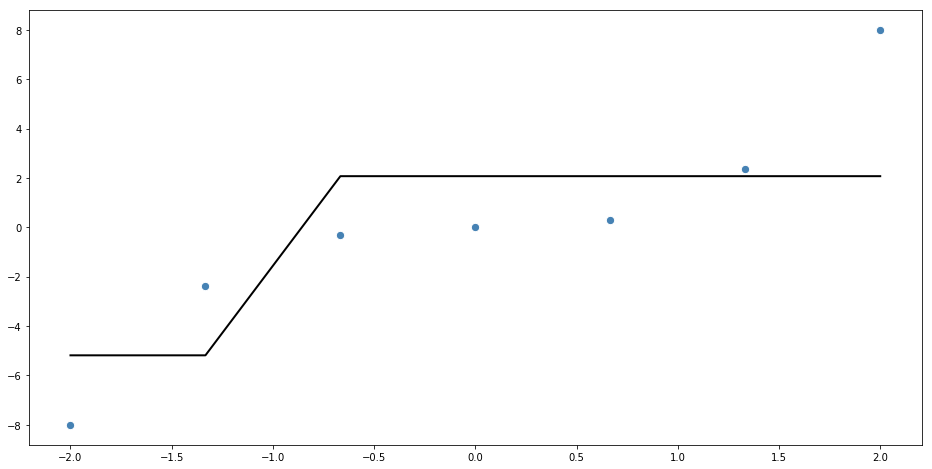

In [23]:
plt.figure(figsize=(16, 8))
plt.scatter(X, y, c='steelblue',                  # Plot actual target against features
            edgecolor='white', s=70)
plt.plot(X, tree.predict(X),                      # Plot predicted target against features
         color='black', lw=2)
#plt.xlabel('% lower status of the population [LSTAT]')
#plt.ylabel('Price in $1000s [MEDV]')
plt.show()

In [34]:
def regression_var_criterion(X,y,t):
    left,right = split(X,t)
    l = left**3
    r = right**3
    le = len(left)/len(X)*np.var(l)
    ri = len(right)/len(X)*np.var(r)
    q = np.var(y) - le-ri
    
    return q

In [72]:
df = pd.read_csv('mlbootcamp5_train.csv.txt', 
                 index_col='id', sep=';')

In [73]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [74]:
import math

In [75]:
df['age in years'] = df['age'].apply(lambda x : math.floor(x/365.25))

In [76]:
one_hot = pd.get_dummies(df, columns=['cholesterol'], prefix=['cholesterol'])



In [77]:
df.drop(df['cholesterol'],  inplace=True)
df= one_hot
df.head()

,age,gender,height,weight,ap_hi,ap_lo,gluc,smoke,alco,active,cardio,age in years,cholesterol_1,cholesterol_2,cholesterol_3
id,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,0,0,1,0,50,1,0,0
1,20228,1,156,85.0,140,90,1,0,0,1,1,55,0,0,1
2,18857,1,165,64.0,130,70,1,0,0,0,1,51,0,0,1
3,17623,2,169,82.0,150,100,1,0,0,1,1,48,1,0,0
4,17474,1,156,56.0,100,60,1,0,0,0,0,47,1,0,0


In [78]:
df = pd.get_dummies(df, columns=['gluc'], prefix=['gluc'])
df.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,age in years,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,1,0,50,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,0,0,1,1,55,0,0,1,1,0,0
2,18857,1,165,64.0,130,70,0,0,0,1,51,0,0,1,1,0,0
3,17623,2,169,82.0,150,100,0,0,1,1,48,1,0,0,1,0,0
4,17474,1,156,56.0,100,60,0,0,0,0,47,1,0,0,1,0,0


In [79]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'smoke', 'alco',
       'active', 'cardio', 'age in years', 'cholesterol_1', 'cholesterol_2',
       'cholesterol_3', 'gluc_1', 'gluc_2', 'gluc_3'],
      dtype='object')

In [80]:
y = df['cardio']
X = df.drop(['cardio'],axis=1)


In [81]:
X.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,age in years,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,1,50,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,0,0,1,55,0,0,1,1,0,0
2,18857,1,165,64.0,130,70,0,0,0,51,0,0,1,1,0,0
3,17623,2,169,82.0,150,100,0,0,1,48,1,0,0,1,0,0
4,17474,1,156,56.0,100,60,0,0,0,47,1,0,0,1,0,0


In [82]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'smoke', 'alco',
       'active', 'cardio', 'age in years', 'cholesterol_1', 'cholesterol_2',
       'cholesterol_3', 'gluc_1', 'gluc_2', 'gluc_3'],
      dtype='object')

In [83]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 17)


In [84]:
my_tree = DecisionTreeClassifier(random_state=17, max_depth=3).fit(X_train,y_train)

In [85]:
export_graphviz(my_tree, feature_names=df.drop('cardio',axis=1).columns, out_file = './asmnt_tree.dot', filled=True)

In [86]:
tree_pred = my_tree.predict(X_valid)
ac_score = accuracy_score(y_valid, tree_pred)


In [87]:
ac_score

0.7212857142857143

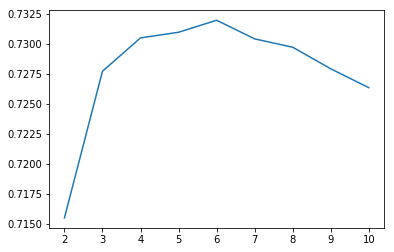

In [88]:
params = np.arange(2,11)
plt.plot(params, tree_grid.cv_results_['mean_test_score'])

In [89]:
tree_grid.best_params_

{'max_depth': 6}

In [90]:
acc_score_computed = tree_grid.score(X_valid,y_valid)

In [91]:
acc_score_computed

0.7258095238095238

In [92]:
tree_grid.best_estimator_, tree_grid.best_score_

(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=17,
             splitter='best'), 0.7319591836734693)

In [93]:
acc1 = my_tree.score

In [94]:
tree_grid.best_params_

{'max_depth': 6}

In [95]:
my_tree.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')>

In [96]:
tree_pred_grid_search = tree_grid.predict(X_valid)
ac_score_grid_search = accuracy_score(y_valid, tree_pred_grid_search)
ac_score_grid_search

0.7258095238095238

In [97]:
print("standard tree accuracy score: " + str(ac_score))
print("grid search tree accuracy score: " + str(ac_score_grid_search))

standard tree accuracy score: 0.7212857142857143
grid search tree accuracy score: 0.7258095238095238


In [98]:
#formula
acc2 = ac_score_grid_search
acc1 = ac_score

In [99]:
result = (acc2 - acc1)/ acc1* 100
print(result)

0.6271869016967002


In [100]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,age in years,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,1,0,50,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,0,0,1,1,55,0,0,1,1,0,0
2,18857,1,165,64.0,130,70,0,0,0,1,51,0,0,1,1,0,0
3,17623,2,169,82.0,150,100,0,0,1,1,48,1,0,0,1,0,0
4,17474,1,156,56.0,100,60,0,0,0,0,47,1,0,0,1,0,0


In [101]:
df['age_40-55'] = df['age in years'].apply(lambda x: 1 if  x >=40 and x < 55 else 0)
df['age_55-60'] = df['age in years'].apply(lambda x: 1 if  x >=55 and x < 60 else 0)
df['age_60-65'] = df['age in years'].apply(lambda x: 1 if  x >=60 and x < 65 else 0)


In [102]:
df['ap_hi_120-140'] = df['ap_hi'].apply(lambda x: 1 if  x >=120 and x < 140 else 0)
df['ap_hi_140-160'] = df['ap_hi'].apply(lambda x: 1 if  x >=140 and x < 160 else 0)
df['ap_hi_160-180'] = df['ap_hi'].apply(lambda x: 1 if  x >=160 and x < 180 else 0)

In [103]:
df['male'] = df['gender'].apply(lambda x : 1 if x ==  2 else 0 )

In [104]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,...,gluc_1,gluc_2,gluc_3,age_40-55,age_55-60,age_60-65,ap_hi_120-140,ap_hi_140-160,ap_hi_160-180,male
id,,,,,,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
1,20228,1,156,85.0,140,90,0,0,1,1,...,1,0,0,0,1,0,0,1,0,0
2,18857,1,165,64.0,130,70,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
3,17623,2,169,82.0,150,100,0,0,1,1,...,1,0,0,1,0,0,0,1,0,1
4,17474,1,156,56.0,100,60,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [105]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'smoke', 'alco',
       'active', 'cardio', 'age in years', 'cholesterol_1', 'cholesterol_2',
       'cholesterol_3', 'gluc_1', 'gluc_2', 'gluc_3', 'age_40-55', 'age_55-60',
       'age_60-65', 'ap_hi_120-140', 'ap_hi_140-160', 'ap_hi_160-180', 'male'],
      dtype='object')

In [106]:
len(df.columns)

24

In [117]:
new_df = df.drop(columns=['age', 'gender', 'height', 'weight', 'ap_hi','ap_lo', 'alco', 'active', 'age in years', 'gluc_1', 'gluc_2', 'gluc_3'])

new_df.head()

,smoke,cardio,cholesterol_1,cholesterol_2,cholesterol_3,age_40-55,age_55-60,age_60-65,ap_hi_120-140,ap_hi_140-160,ap_hi_160-180,male
id,,,,,,,,,,,,
0,0,0,1,0,0,1,0,0,0,0,0,1
1,0,1,0,0,1,0,1,0,0,1,0,0
2,0,1,0,0,1,1,0,0,1,0,0,0
3,0,1,1,0,0,1,0,0,0,1,0,1
4,0,0,1,0,0,1,0,0,0,0,0,0


In [118]:
len(new_df.columns)

12

In [119]:
new_df.columns

Index(['smoke', 'cardio', 'cholesterol_1', 'cholesterol_2', 'cholesterol_3',
       'age_40-55', 'age_55-60', 'age_60-65', 'ap_hi_120-140', 'ap_hi_140-160',
       'ap_hi_160-180', 'male'],
      dtype='object')

In [121]:
new_tree = DecisionTreeClassifier(max_depth=3, random_state=17)

new_tree.fit(new_df.drop('cardio', axis=1), new_df['cardio'])
export_graphviz(new_tree, feature_names=new_df.drop('cardio', axis=1).columns,out_file='./asmnt_tree_final.dot', filled=True)

#export_graphviz(my_tree, feature_names=df.drop('cardio',axis=1).columns, out_file = './asmnt_tree.dot', filled=True)

# import graphviz
# graph = graphviz.Source('asmnt_tree_final.dot')  
# graph 